In [1]:
#import in dataset/ packages
import pandas as pd
import zipfile
import os
zip_file_path = r'C:\Users\grace\OneDrive\Documents\GitHub\Data400_Spring25\miniProject\games.csv.zip'

In [2]:
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    print("Files in the zip:", file_names)
    
    # Extract and load the CSV
    csv_file_name = file_names[0]  
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)

# Display the dataframe
display(df.head())

Files in the zip: ['games.csv']


attendance  away_final_score away_team        date  elapsed_time  \
0       35055                 3       sln  2015-04-05           184   
1       45909                 1       ana  2015-04-06           153   
2       36969                 2       atl  2015-04-06           156   
3       31042                 6       bal  2015-04-06           181   
4       45549                 8       bos  2015-04-06           181   

        g_id  home_final_score home_team start_time    umpire_1B  \
0  201500001                 0       chn    7:17 PM  Mark Wegner   
1  201500002                 4       sea    1:12 PM    Ron Kulpa   
2  201500003                 1       mia    4:22 PM     Laz Diaz   
3  201500004                 2       tba    3:12 PM    Ed Hickox   
4  201500005                 0       phi    3:08 PM   Phil Cuzzi   

        umpire_2B        umpire_3B      umpire_HP          venue_name  \
0    Marty Foster  Mike Muchlinski   Mike Winters       Wrigley Field   
1    Brian Knight    Vic Carapazza  Larry Vanover        Safeco Field   
2  Chris Guccione      Cory Blaser    Jeff Nelson        Marlins Park   
3     Paul Nauert   Mike Estabrook    Dana DeMuth     Tropicana Field   
4   Tony Randazzo      Will Little    Gerry Davis  Citizens Bank Park   

                     weather                wind  delay  
0          44 degrees, clear   7 mph, In from CF      0  
1         54 degrees, cloudy       1 mph, Varies      0  
2  80 degrees, partly cloudy  16 mph, In from CF     16  
3           72 degrees, dome         0 mph, None      0  
4  71 degrees, partly cloudy   11 mph, Out to RF      0

In [3]:
import pandas as pd
import zipfile

# Load original game dataset from the zip file
zip_file_path = r'C:\Users\grace\OneDrive\Documents\GitHub\Data400_Spring25\miniProject\games.csv.zip'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    csv_file_name = 'games.csv'  
    with z.open(csv_file_name) as f:
        df_games = pd.read_csv(f)

# Load the MLB ticket prices dataset
ticket_prices_file_path = r'C:\Users\grace\OneDrive\Documents\GitHub\Data400_Spring25\miniProject\MLB ticket price averages 2015-2018.csv'
df_ticket_prices = pd.read_csv(ticket_prices_file_path)

# Ensure the column names match between the datasets
df_games['Year'] = pd.to_datetime(df_games['date']).dt.year
df_games.rename(columns={'home_team': 'Team'}, inplace=True)

# Standardize team names if necessary 
df_games['Team'] = df_games['Team'].str.lower()
df_ticket_prices['Team'] = df_ticket_prices['Team'].str.lower()

# Merge the datasets on Team and Year
merged_df = pd.merge(df_games, df_ticket_prices, on=['Team', 'Year'], how='left')

# Display the merged dataframe
print("Merged Dataset:")
display(merged_df.head())

# Save the merged dataframe to CSV
merged_df.to_csv(r'C:\Users\grace\OneDrive\Documents\GitHub\Data400_Spring25\miniProject\merged_games_with_ticket_prices.csv', index=False)


Merged Dataset:


attendance  away_final_score away_team        date  elapsed_time  \
0       35055                 3       sln  2015-04-05           184   
1       45909                 1       ana  2015-04-06           153   
2       36969                 2       atl  2015-04-06           156   
3       31042                 6       bal  2015-04-06           181   
4       45549                 8       bos  2015-04-06           181   

        g_id  home_final_score Team start_time    umpire_1B       umpire_2B  \
0  201500001                 0  chn    7:17 PM  Mark Wegner    Marty Foster   
1  201500002                 4  sea    1:12 PM    Ron Kulpa    Brian Knight   
2  201500003                 1  mia    4:22 PM     Laz Diaz  Chris Guccione   
3  201500004                 2  tba    3:12 PM    Ed Hickox     Paul Nauert   
4  201500005                 0  phi    3:08 PM   Phil Cuzzi   Tony Randazzo   

         umpire_3B      umpire_HP          venue_name  \
0  Mike Muchlinski   Mike Winters       Wrigley Field   
1    Vic Carapazza  Larry Vanover        Safeco Field   
2      Cory Blaser    Jeff Nelson        Marlins Park   
3   Mike Estabrook    Dana DeMuth     Tropicana Field   
4      Will Little    Gerry Davis  Citizens Bank Park   

                     weather                wind  delay  Year  \
0          44 degrees, clear   7 mph, In from CF      0  2015   
1         54 degrees, cloudy       1 mph, Varies      0  2015   
2  80 degrees, partly cloudy  16 mph, In from CF     16  2015   
3           72 degrees, dome         0 mph, None      0  2015   
4  71 degrees, partly cloudy   11 mph, Out to RF      0  2015   

   Average Ticket Price  
0                 44.31  
1                 31.00  
2                 28.96  
3                 21.90  
4                 37.42

In [4]:
# Select only the specified columns (removing those that arent important for this project, e.g. umpires)
selected_columns = [
    'attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time', 
    'home_final_score', 'Team', 'start_time', 'venue_name', 'weather', 
    'wind', 'delay', 'Year', 'Average Ticket Price'
]

# Display the selected columns from the merged dataset
print("Merged Dataset (Selected Columns):")
display(merged_df[selected_columns].head())


Merged Dataset (Selected Columns):


attendance  away_final_score away_team        date  elapsed_time  \
0       35055                 3       sln  2015-04-05           184   
1       45909                 1       ana  2015-04-06           153   
2       36969                 2       atl  2015-04-06           156   
3       31042                 6       bal  2015-04-06           181   
4       45549                 8       bos  2015-04-06           181   

   home_final_score Team start_time          venue_name  \
0                 0  chn    7:17 PM       Wrigley Field   
1                 4  sea    1:12 PM        Safeco Field   
2                 1  mia    4:22 PM        Marlins Park   
3                 2  tba    3:12 PM     Tropicana Field   
4                 0  phi    3:08 PM  Citizens Bank Park   

                     weather                wind  delay  Year  \
0          44 degrees, clear   7 mph, In from CF      0  2015   
1         54 degrees, cloudy       1 mph, Varies      0  2015   
2  80 degrees, partly cloudy  16 mph, In from CF     16  2015   
3           72 degrees, dome         0 mph, None      0  2015   
4  71 degrees, partly cloudy   11 mph, Out to RF      0  2015   

   Average Ticket Price  
0                 44.31  
1                 31.00  
2                 28.96  
3                 21.90  
4                 37.42

In [8]:
#import packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  


In [5]:
# describe the dataset's metrics
merged_df.describe()


attendance  away_final_score  elapsed_time          g_id  \
count  10041.000000      10041.000000  10041.000000  1.004100e+04   
mean   29500.667165          4.362215    184.791355  2.016513e+08   
std    10243.701612          3.143222     27.158854  1.118157e+05   
min        0.000000          0.000000     75.000000  2.015000e+08   
25%    21460.000000          2.000000    167.000000  2.016000e+08   
50%    29771.000000          4.000000    182.000000  2.017000e+08   
75%    37714.000000          6.000000    199.000000  2.018000e+08   
max    56310.000000         24.000000    409.000000  2.018024e+08   

       home_final_score         delay          Year  Average Ticket Price  
count      10041.000000  10041.000000  10041.000000            7368.00000  
mean           4.557813      3.961358   2016.500548              31.53751  
std            3.174988     27.108001      1.118134               9.87899  
min            0.000000      0.000000   2015.000000              16.37000  
25%            2.000000      0.000000   2016.000000              24.46000  
50%            4.000000      0.000000   2017.000000              29.76000  
75%            6.000000      0.000000   2018.000000              35.76000  
max           25.000000   1860.000000   2018.000000              66.00000

In [6]:
#separate the weather column so maniupulation is easier 
merged_df['temperature_numeric'] = merged_df['weather'].str.extract(r'(\d+)').astype(int)
print(merged_df[['weather', 'temperature_numeric']].head())
merged_df['weather_condition'] = merged_df['weather'].str.split(', ').str[1]
print(merged_df[['weather', 'weather_condition']].head())

                     weather  temperature_numeric
0          44 degrees, clear                   44
1         54 degrees, cloudy                   54
2  80 degrees, partly cloudy                   80
3           72 degrees, dome                   72
4  71 degrees, partly cloudy                   71
                     weather weather_condition
0          44 degrees, clear             clear
1         54 degrees, cloudy            cloudy
2  80 degrees, partly cloudy     partly cloudy
3           72 degrees, dome              dome
4  71 degrees, partly cloudy     partly cloudy


C:\Users\grace\AppData\Local\Temp\ipykernel_7724\3488310731.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


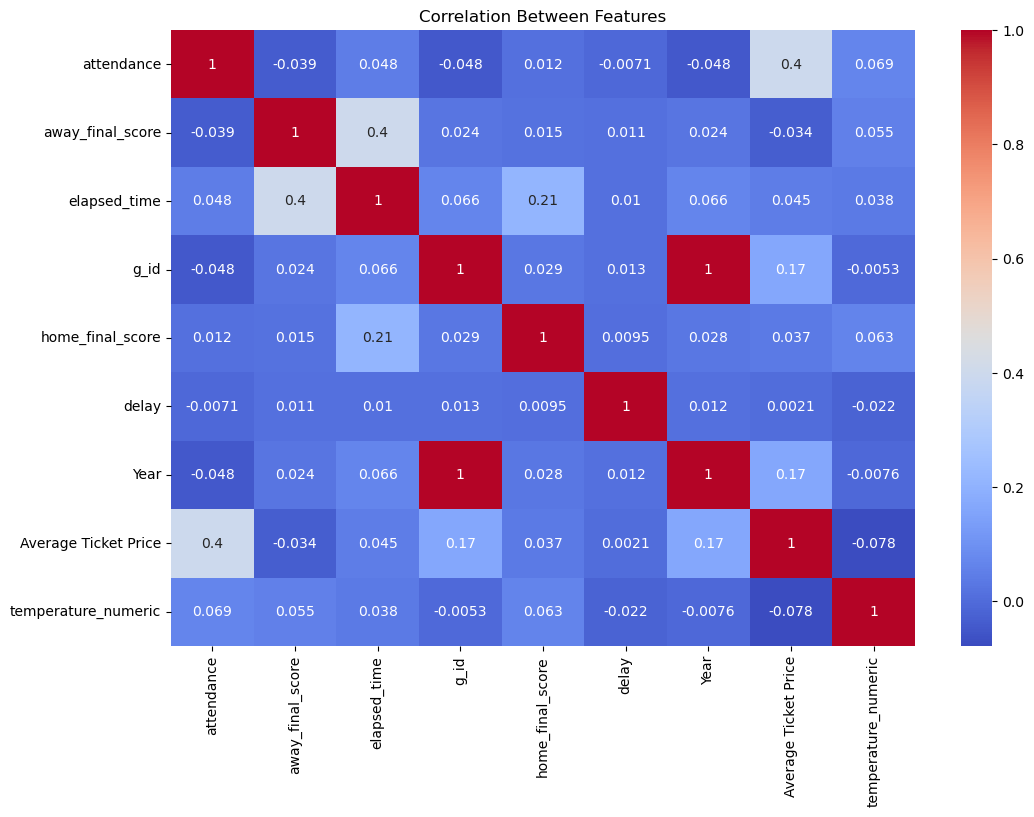

In [9]:
# show heatmap/ corrlation matrix for features
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

From the heatmap we can see that temperature has a large correlation to attendance, we can also see correlation in average ticket price in attendance, along with elapsed time. 

In [10]:
#data cleaning
merged_df.dropna(inplace=True)
Q1 = merged_df['attendance'].quantile(0.25)
Q3 = merged_df['attendance'].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df['attendance'] >= Q1 - 1.5 * IQR) & (merged_df['attendance'] <= Q3 + 1.5 * IQR)]


Intercept: 24740.925125844
Coefficient for temperature: 72.49890249695443


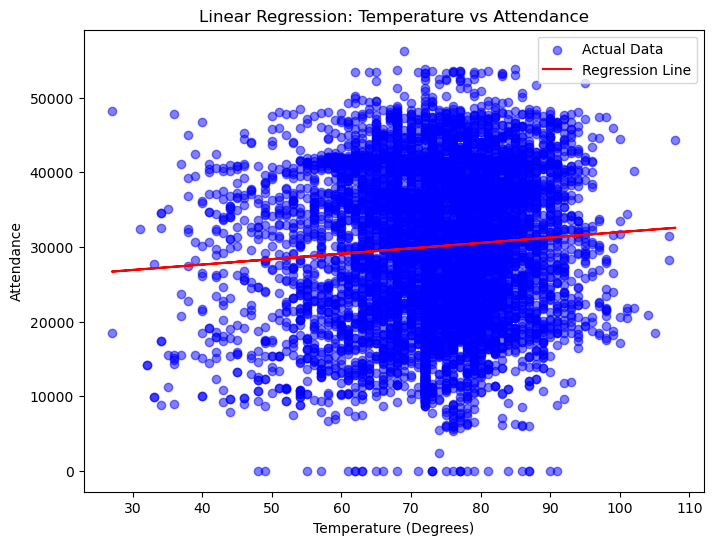

In [11]:
#Linear regression to show if higher rainfall decreases attendance and how much each degree affects attendance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Features and target
X = merged_df[['temperature_numeric']]  # Feature: Temperature
y = merged_df['attendance']  # Target: Attendance

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X, y)

# Model parameters
print("Intercept:", lr.intercept_)
print("Coefficient for temperature:", lr.coef_[0])

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, lr.predict(X), color='red', label='Regression Line')
plt.xlabel('Temperature (Degrees)')
plt.ylabel('Attendance')
plt.title('Linear Regression: Temperature vs Attendance')
plt.legend()
plt.show()

In [12]:
# show regression coefficients for different weather conditions on attendance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# One-hot encode the categorical weather condition columns
X = merged_df[['temperature_numeric']].join(
    pd.get_dummies(merged_df[[col for col in merged_df.columns if 'weather_condition' in col]])
)

# Define the target variable y (attendance)
y = merged_df['attendance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients (how each feature affects attendance)
coefficients = model.coef_
print("Coefficients for each feature:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


Mean Squared Error: 92675574.29511146
Coefficients for each feature:
temperature_numeric: 50.07363490765581
weather_condition_clear: 3350.1622836828064
weather_condition_cloudy: 1796.2336544328327
weather_condition_dome: -13032.857968723656
weather_condition_drizzle: 3202.4788001454626
weather_condition_overcast: 521.3580889113797
weather_condition_partly cloudy: 2358.932211707008
weather_condition_rain: -1536.8070641944767
weather_condition_roof closed: -1733.5915062843565
weather_condition_snow: 0.0
weather_condition_sunny: 5074.091500323011


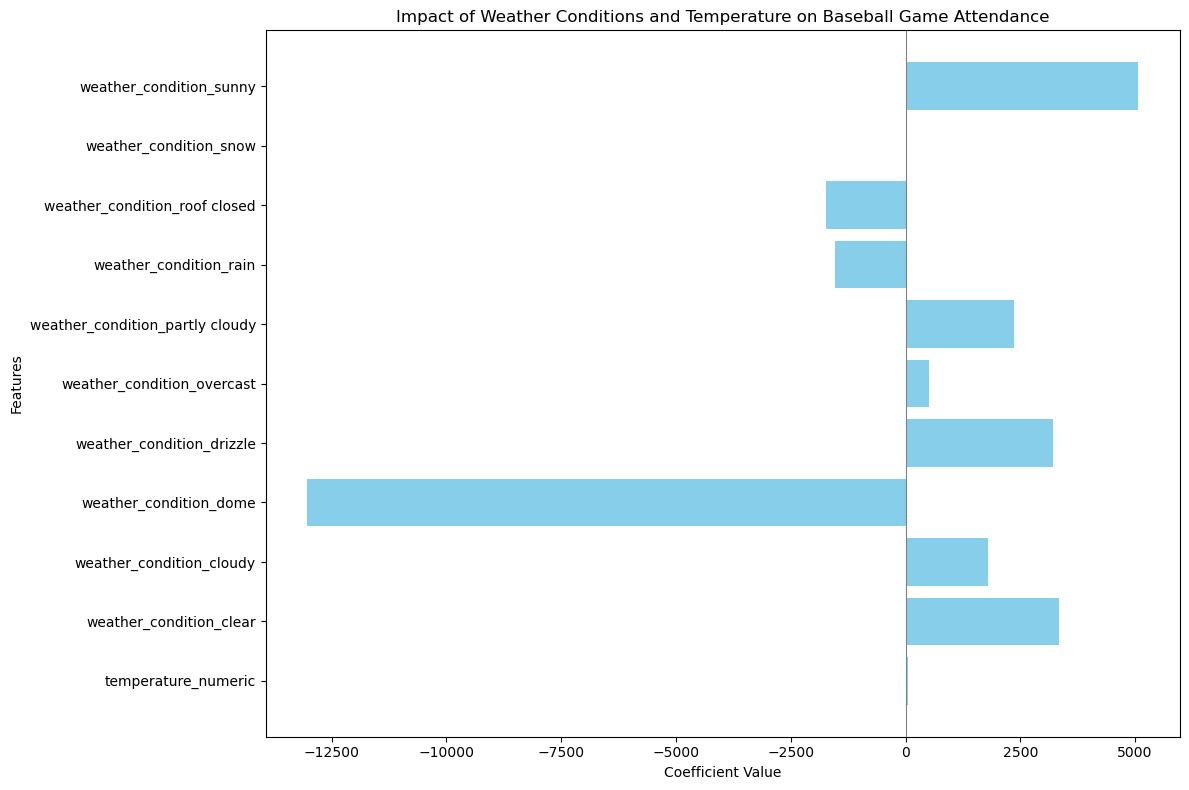

In [13]:
#plotting a visual on regression coefficients for reference
import matplotlib.pyplot as plt

# Regression coefficients for each feature
coefficients = {
    'temperature_numeric': 50.07363490765581,
    'weather_condition_clear': 3350.1622836828064,
    'weather_condition_cloudy': 1796.2336544328327,
    'weather_condition_dome': -13032.857968723656,
    'weather_condition_drizzle': 3202.4788001454626,
    'weather_condition_overcast': 521.3580889113797,
    'weather_condition_partly cloudy': 2358.932211707008,
    'weather_condition_rain': -1536.8070641944767,
    'weather_condition_roof closed': -1733.5915062843565,
    'weather_condition_snow': 0.0,
    'weather_condition_sunny': 5074.091500323011
}

# Separate the feature names and their coefficients
features = list(coefficients.keys())
coeff_vals = list(coefficients.values())

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(features, coeff_vals, color='skyblue')
plt.axvline(0, color='gray', linewidth=0.8)  # Add a reference line at zero

# Add titles and labels
plt.title("Impact of Weather Conditions and Temperature on Baseball Game Attendance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


R² Score: 0.10575652000934321
Root Mean Squared Error (RMSE): 9626.815376598404
Mean Absolute Error (MAE): 8088.450246148529


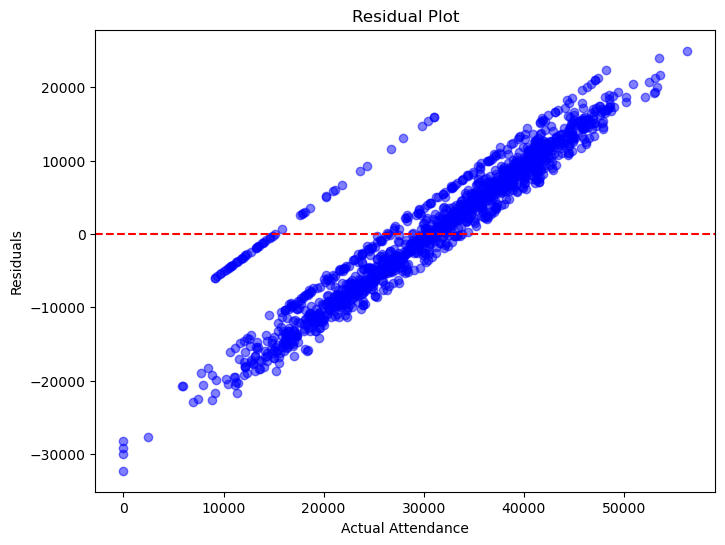

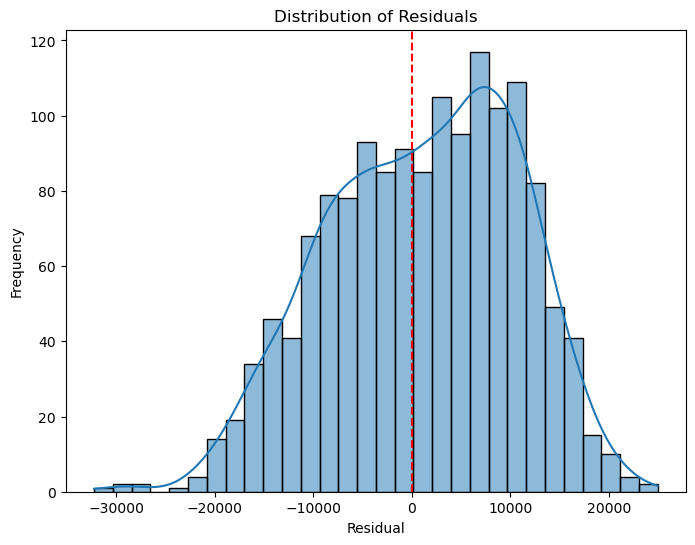

In [14]:
#checking model accuracy

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

import numpy as np

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Attendance")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


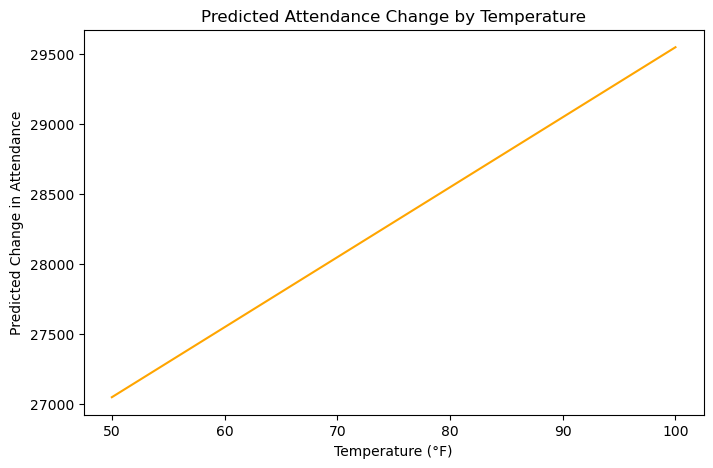

In [16]:
# graph to visualize the correlation of an increase in temperature and attendance 
import numpy as np
import matplotlib.pyplot as plt

coefficients = model.coef_ if hasattr(model, "coef_") else [0.5]  
intercept = model.intercept_ if hasattr(model, "intercept_") else 10  

# Generate temperature values for predictions
temperatures = np.linspace(50, 100, 50).reshape(-1, 1)  

# Compute attendance predictions: y = mx + b
attendance_predictions = temperatures * coefficients[0] + intercept

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(temperatures, attendance_predictions, color='orange')
plt.title("Predicted Attendance Change by Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Predicted Change in Attendance")
plt.show()


In [17]:
# Drop one of the weather condition columns to avoid the dummy variable trap
X_train = X_train.drop(columns=['weather_condition_clear'], errors='ignore')

# Print the updated DataFrame to evaluate if the features are ready
print(X_train.head())


      temperature_numeric  weather_condition_cloudy  weather_condition_dome  \
8419                   71                         0                       0   
9321                   76                         0                       0   
7947                   42                         0                       0   
2996                   61                         0                       0   
749                    81                         0                       0   

      weather_condition_drizzle  weather_condition_overcast  \
8419                          0                           0   
9321                          0                           0   
7947                          0                           0   
2996                          1                           0   
749                           0                           0   

      weather_condition_partly cloudy  weather_condition_rain  \
8419                                0                       0   
9321            

In [22]:
#creating a random forest regression to see if I can get better accuracy 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

if 'weather_condition' in X_train.columns:
    # Extract the categorical weather condition column
    weather_data = X_train[['weather_condition']]

    # Apply OneHotEncoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    weather_encoded = encoder.fit_transform(weather_data)

    # Update column names
    weather_columns = encoder.get_feature_names_out(['weather_condition'])

    # Create DataFrame for the encoded columns
    weather_encoded_df = pd.DataFrame(weather_encoded, columns=weather_columns, index=X_train.index)

    # Drop the original weather column and combine with the encoded columns
    X_train = X_train.drop(columns=['weather_condition']).join(weather_encoded_df)
else:
    print("Column 'weather_condition' not found in X_train.")

# Check if it worked
print(X_train.head())


Column 'weather_condition' not found in X_train.
      temperature_numeric  weather_condition_cloudy  weather_condition_dome  \
8419                   71                         0                       0   
9321                   76                         0                       0   
7947                   42                         0                       0   
2996                   61                         0                       0   
749                    81                         0                       0   

      weather_condition_drizzle  weather_condition_overcast  \
8419                          0                           0   
9321                          0                           0   
7947                          0                           0   
2996                          1                           0   
749                           0                           0   

      weather_condition_partly cloudy  weather_condition_rain  \
8419                            

Weather columns: ['sunny', 'rain', 'cloudy', 'drizzle']
Weather importances: [0.49929602 0.02636884 0.29306688 0.00886185]


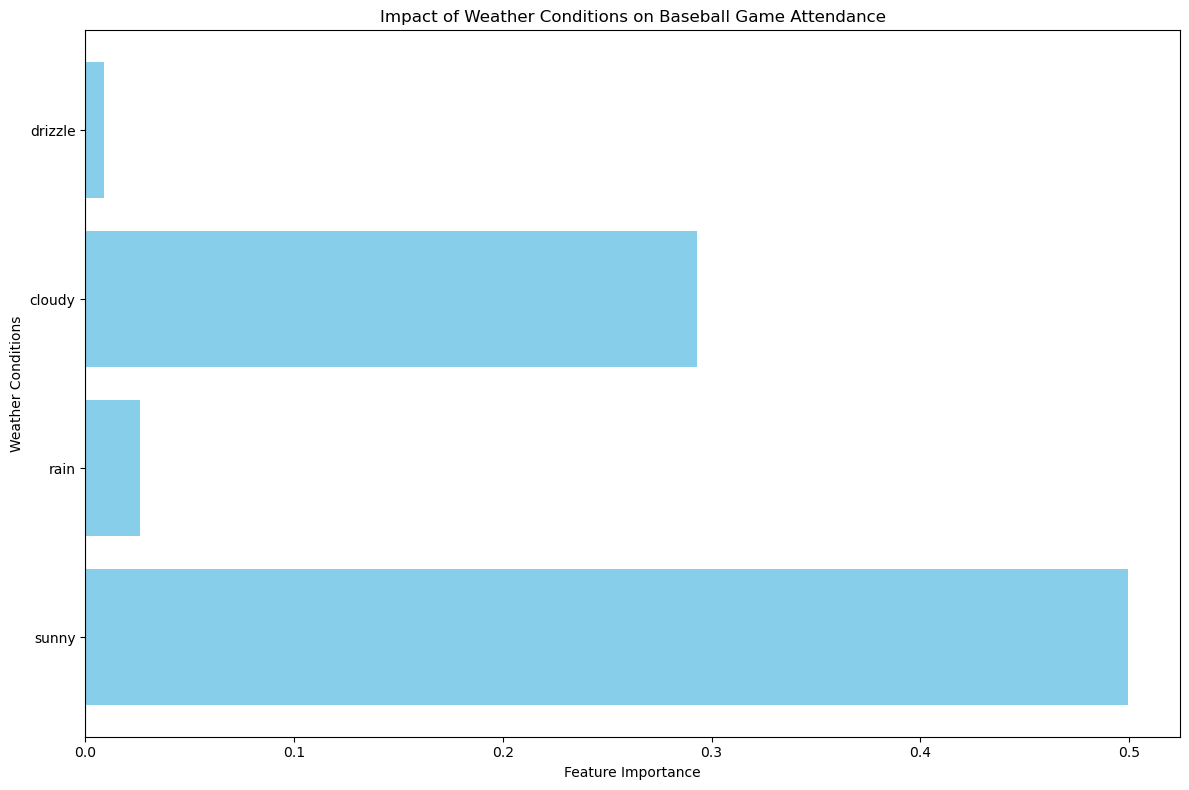

In [24]:
#create visualization to show the impact of weather conditions on attendance
import matplotlib.pyplot as plt

weather_columns = ['sunny', 'rain', 'cloudy', 'drizzle']  

# Ensure the model has the feature_importances_ attribute (like RandomForest)
if hasattr(model, 'feature_importances_'):
    weather_importances = model.feature_importances_[:len(weather_columns)]
    
    # Check the weather columns and their corresponding feature importances
    print(f"Weather columns: {weather_columns}")
    print(f"Weather importances: {weather_importances}")

    # Create a bar chart to visualize the impact of weather conditions on attendance
    plt.figure(figsize=(12, 8))
    plt.barh(weather_columns, weather_importances, color='skyblue')
    plt.axvline(0, color='gray', linewidth=0.8)  # Reference line at zero

    plt.title("Impact of Weather Conditions on Baseball Game Attendance")
    plt.xlabel("Feature Importance")
    plt.ylabel("Weather Conditions")
    plt.tight_layout()
    plt.show()
else:
    print("Model does not support feature importances.")


From this graph we can see that the weather condition "sunny" has the highest impact on attendance. We can see that if it is drizzling, there isn't as large of an impact on attendance.

In [27]:
#preparing the dataset and training a linear regression model to predict attendance based on temperature AND weather condtion
from sklearn.linear_model import LinearRegression
import pandas as pd

# One-hot encode the 'weather_condition' column into separate columns
weather_condition_columns = pd.get_dummies(merged_df['weather_condition'], prefix='weather_condition')

# Add the one-hot encoded columns to the original dataframe
merged_df = pd.concat([merged_df, weather_condition_columns], axis=1)

# Select relevant features (temperature and weather conditions)
features = ['temperature_numeric', 
            'weather_condition_cloudy', 
            'weather_condition_dome', 
            'weather_condition_drizzle', 
            'weather_condition_overcast', 
            'weather_condition_partly cloudy', 
            'weather_condition_rain', 
            'weather_condition_roof closed', 
            'weather_condition_snow', 
            'weather_condition_sunny']

# Target variable: attendance
target = 'attendance'

# Prepare the dataset
X = merged_df[features]
y = merged_df[target]

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Output the regression coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 28470.574118423265
Coefficients: [    45.7535674   -1489.8835813  -16501.47198486   1380.32727118
  -3075.23072546  -1155.01668266  -4581.94229848  -5103.20587354
  18510.0795619    1740.82273388]


In [28]:
#step 2
#split the data into train and test sets
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
#step 3
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [30]:
#step 4
#evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 8086.177408778325
MSE: 92581726.27340764
R-squared: 0.10666207664772376


Once again the R-squared value is around 10, meaning this model only predicts about 10% of the variation based on weather

In [31]:
# Predict attendance and calculate predicted revenue 
merged_df['predicted_attendance'] = model.predict(X)
merged_df['predicted_revenue'] = (merged_df['predicted_attendance'] * merged_df['Average Ticket Price']).round(2)

# Display the updated DataFrame with rounded revenue
print(merged_df[['date', 'temperature_numeric', 'weather', 'predicted_attendance', 'predicted_revenue']].head())


         date  temperature_numeric                    weather  \
0  2015-04-05                   44          44 degrees, clear   
1  2015-04-06                   54         54 degrees, cloudy   
2  2015-04-06                   80  80 degrees, partly cloudy   
3  2015-04-06                   72           72 degrees, dome   
4  2015-04-06                   71  71 degrees, partly cloudy   

   predicted_attendance  predicted_revenue  
0          30096.768291         1333587.80  
1          29043.576011          900350.86  
2          30908.189076          895101.16  
3          15115.809816          331036.23  
4          30457.526362         1139720.64  


In [33]:
# calculate model accuracy again
from sklearn.metrics import mean_absolute_error

# Use 'attendance' as the actual attendance column
actual_attendance = merged_df['attendance']  # Replace with the actual attendance data column

# Calculate MAE between actual and predicted attendance
mae = mean_absolute_error(actual_attendance, merged_df['predicted_attendance'])
print(f'Mean Absolute Error (MAE): {mae}')

#print('this raises a flag because the MAE is extremly high, meaning the models prediction is off by around 8000 people')
from sklearn.metrics import r2_score
r2 = r2_score(actual_attendance, merged_df['predicted_attendance'])
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 8150.816752755212
R-squared: 0.10525696566847009


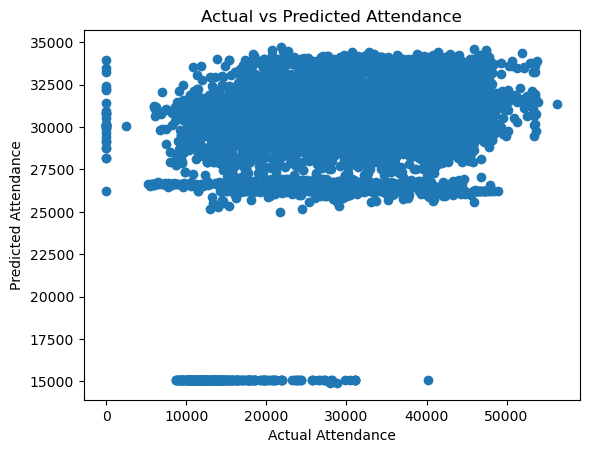

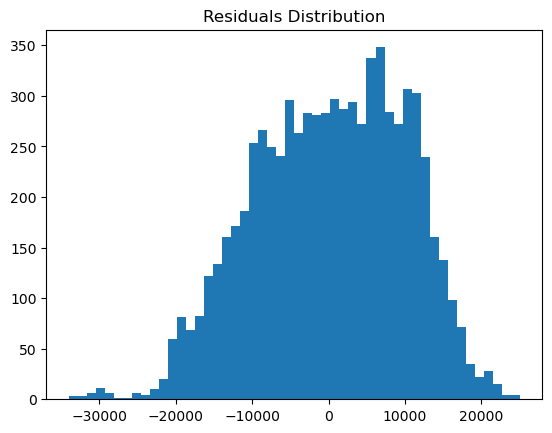

In [34]:
# build a visualization to check for outliers
import matplotlib.pyplot as plt
#check for outliers
plt.scatter(actual_attendance, merged_df['predicted_attendance'])
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title('Actual vs Predicted Attendance')
plt.show()
# check the residuals
residuals = actual_attendance - merged_df['predicted_attendance']
plt.hist(residuals, bins=50)
plt.title('Residuals Distribution')
plt.show()


In [37]:
#check feautre importance
# For a linear regression model, check the coefficients
print(f'Coefficients: {model.coef_}')


Coefficients: [    50.07363491  -1553.92862925 -16383.02025241   -147.68348354
  -2828.80419477   -991.23007198  -4886.96934788  -5083.75378997
      0.           1723.92921664]


In [38]:
# attempting another approach- fitting a random forrest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
predicted_rf_attendance = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, predicted_rf_attendance)
print(f'Mean Absolute Error (Random Forest, Test Set): {mae_rf}')


Mean Absolute Error (Random Forest, Test Set): 8133.118067515374


In [39]:
# utilizing cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validation MAE: {-cv_scores.mean()}')


Cross-validation MAE: 8168.922805929928


         attendance  away_final_score  elapsed_time          g_id  \
count   7366.000000       7366.000000   7366.000000  7.366000e+03   
mean   30063.206761          4.310073    183.717078  2.016375e+08   
std    10330.146699          3.121826     27.434723  1.227428e+05   
min        0.000000          0.000000     75.000000  2.015000e+08   
25%    22060.750000          2.000000    166.000000  2.015019e+08   
50%    30669.500000          4.000000    181.000000  2.016014e+08   
75%    38426.250000          6.000000    197.000000  2.018005e+08   
max    56310.000000         24.000000    409.000000  2.018024e+08   

       home_final_score        delay         Year  Average Ticket Price  \
count       7366.000000  7366.000000  7366.000000           7366.000000   
mean           4.535433     4.013304  2016.363155             31.533546   
std            3.173299    29.425822     1.227406              9.874920   
min            0.000000     0.000000  2015.000000             16.370000   
25%

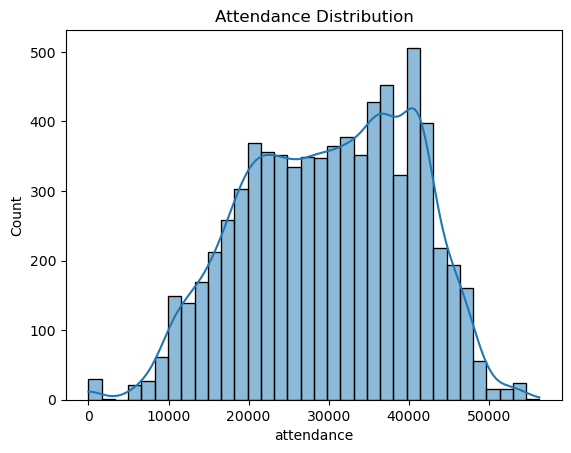

C:\Users\grace\AppData\Local\Temp\ipykernel_7724\552596439.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


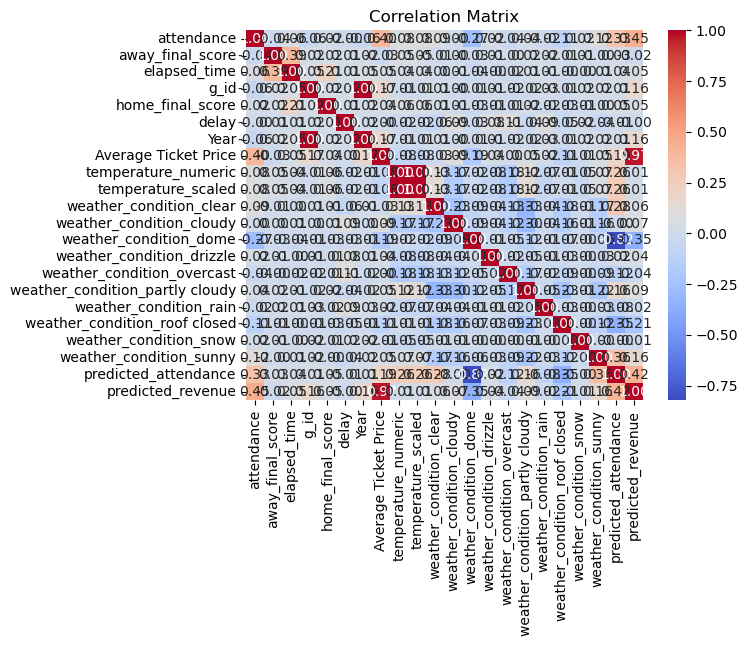

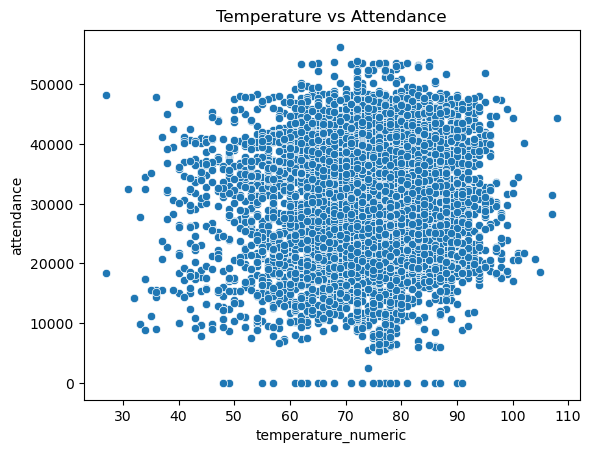

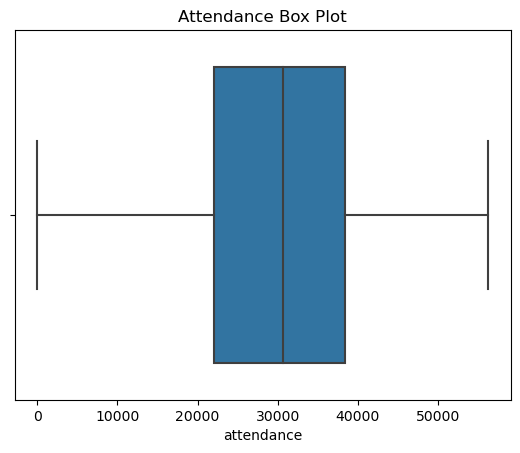

Feature Importances: {'temperature_scaled': 0.7491425539393803, 'weather_condition_cloudy': 0.10401682013206946, 'weather_condition_rain': 0.023310163812710637, 'weather_condition_sunny': 0.12353046211583946}


In [42]:
# This script performs exploratory data analysis (EDA) and feature importance evaluation for predicting baseball game attendance.
# - Computes and prints descriptive statistics.
# - Visualizes attendance distribution, correlation heatmap, and relationships between temperature and attendance.
# - Identifies potential outliers using a box plot.
# - Trains a Random Forest model to determine feature importance for attendance prediction.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Ensure necessary columns exist
if 'temperature_numeric' not in merged_df.columns:
    raise KeyError("'temperature_numeric' column is missing from the DataFrame.")
if 'wind_numeric' not in merged_df.columns:
    print("Warning: 'wind_numeric' column is missing. 'wind_scaled' will not be included.")

# Standardize numeric features if they exist
scaler = StandardScaler()
merged_df['temperature_scaled'] = scaler.fit_transform(merged_df[['temperature_numeric']])

if 'wind_numeric' in merged_df.columns:
    merged_df['wind_scaled'] = scaler.fit_transform(merged_df[['wind_numeric']])

# Descriptive Statistics
print(merged_df.describe())

# Visualizations
# Distribution of attendance
sns.histplot(merged_df['attendance'], kde=True)
plt.title('Attendance Distribution')
plt.show()

# Correlation heatmap
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for temperature vs. attendance
sns.scatterplot(x='temperature_numeric', y='attendance', data=merged_df)
plt.title('Temperature vs Attendance')
plt.show()

# Box plot to check for outliers in attendance
sns.boxplot(x=merged_df['attendance'])
plt.title('Attendance Box Plot')
plt.show()

# Feature Importance: Identify which features are most important for prediction
# Define the list of features and dynamically include only those that exist
selected_features = ['temperature_scaled', 'wind_scaled', 'weather_condition_cloudy', 
                     'weather_condition_rain', 'weather_condition_sunny']

available_features = [col for col in selected_features if col in merged_df.columns]
if not available_features:
    raise ValueError("No valid features found for training the model.")

X = merged_df[available_features]
y = merged_df['attendance']

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Print feature importances
feature_importances = model.feature_importances_
print(f'Feature Importances: {dict(zip(available_features, feature_importances))}')


In [33]:
#performs one-hot encoding for weather conditions in a dataset to ensure consistency between training and test data
import pandas as pd

# List of possible weather conditions for dynamic column names
weather_conditions = [f'weather_condition_{condition}' for condition in 
                       ['cloudy', 'dome', 'drizzle', 'overcast', 'partly cloudy', 
                        'rain', 'roof closed', 'snow', 'sunny']]

# Example DataFrame with weather conditions for training
df = pd.DataFrame({'weather': ['cloudy', 'sunny', 'rain']})
encoded_df = pd.get_dummies(df, prefix='weather', columns=['weather'])

# Extract the column names generated by pd.get_dummies()
weather_conditions_from_training = encoded_df.columns.tolist()
print(f"Generated weather conditions: {weather_conditions_from_training}")

# Example input to encode
test_weather = ['cloudy']

# One-hot encode the test weather condition
encoded = pd.get_dummies(pd.DataFrame({'weather': test_weather}), prefix='weather', columns=['weather'])

# Ensure all columns are present and in the correct order
for condition in weather_conditions_from_training:
    if condition not in encoded.columns:
        encoded[condition] = 0

# Reorder columns to match the training data
encoded = encoded[weather_conditions_from_training]
print("Encoded result:")
print(encoded)


Generated weather conditions: ['weather_cloudy', 'weather_rain', 'weather_sunny']
Encoded result:
   weather_cloudy  weather_rain  weather_sunny
0               1             0              0


In [43]:
# Extract numeric part of the wind speed
merged_df['wind_numeric'] = (
    merged_df['wind']
    .str.extract(r'(\d+)')  
    .astype(float)  
)

print(merged_df[['wind', 'wind_numeric']].head()) 

from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(merged_df[['temperature_numeric', 'wind_numeric']])

# Scale test scenario values
scaled_features = scaler.transform([[20, 7]])
print("Scaled features:", scaled_features)


                 wind  wind_numeric
0   7 mph, In from CF           7.0
1       1 mph, Varies           1.0
2  16 mph, In from CF          16.0
3         0 mph, None           0.0
4   11 mph, Out to RF          11.0
Scaled features: [[-4.92614664 -0.09349899]]


C:\Users\grace\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
print(merged_df.columns)

Index(['attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'g_id', 'home_final_score', 'Team', 'start_time', 'umpire_1B',
       'umpire_2B', 'umpire_3B', 'umpire_HP', 'venue_name', 'weather', 'wind',
       'delay', 'Year', 'Average Ticket Price', 'temperature_numeric',
       'weather_condition', 'temperature_scaled', 'weather_condition_clear',
       'weather_condition_cloudy', 'weather_condition_dome',
       'weather_condition_drizzle', 'weather_condition_overcast',
       'weather_condition_partly cloudy', 'weather_condition_rain',
       'weather_condition_roof closed', 'weather_condition_snow',
       'weather_condition_sunny', 'predicted_attendance', 'predicted_revenue',
       'wind_numeric'],
      dtype='object')


In [38]:
### trial/ error - trying new models to better accuracy

param_grid = {
    'n_estimators': [50, 100],  # Fewer trees
    'max_depth': [10, 20],  # Smaller depth
    'min_samples_split': [2, 5]
}
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
print("Best Parameters: ", random_search.best_params_)


Best Parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 10}


In [45]:
# feauture engingeering to fix model
# Example: Creating interaction features or transforming existing features
merged_df['temperature_squared'] = merged_df['temperature_numeric'] ** 2

# For example, adding a "weather" category
merged_df['weather_encoded'] = merged_df['weather'].map({'sunny': 0, 'rainy': 1, 'cloudy': 2, 'snowy': 3})

# Recalculate X and y after feature engineering
X = merged_df[['temperature_numeric', 'weather_encoded', 'temperature_squared']]  # Adjust according to your features
y = merged_df['attendance']


In [46]:
# attempting XGBoost is often more accurate than Random Forest because it uses a boosting algorithm rather than bagging
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 8480.568184468284
MSE: 100944260.85900511
R-squared: 0.02597045875114745


In [43]:
#hyper paramic tuning

from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters: ", random_search.best_params_)

# Train the model with best parameters
best_model = random_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


Best Parameters:  {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
MAE: 8488.16843516791
MSE: 100263740.38341068
R-squared: 0.03253692465037805


In [44]:
#cross validation

from sklearn.model_selection import cross_val_score

# Evaluate using 5-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Cross-validation MAE: {-cv_scores.mean()}")


Cross-validation MAE: 8572.354868282098


In [46]:
# feature selection using XGBoost, attempting to improve model accuracy and efficiency by focusing on the most important features

# Ensure the input data is a pandas DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Initialize and fit the model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Feature selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(xgb_model)
X_train_selected = selector.fit_transform(X_train, y_train)

# Now apply the same transformation to X_test
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
xgb_model.fit(X_train_selected, y_train)

# Predict on the selected features
y_pred = xgb_model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 8480.653927185804
MSE: 100950971.76013646
R-squared: 0.02590570404498871


Stricter IQR - Dataset Size: 5983
Stricter IQR - MAE: 8302.896516344856
Stricter IQR - R-squared: 0.015736113244962713
----------------------------------------
Z-Score - Dataset Size: 7086
Z-Score - MAE: 8193.279053198432
Z-Score - R-squared: 0.03755557619605099
----------------------------------------
Best Method: Z-Score


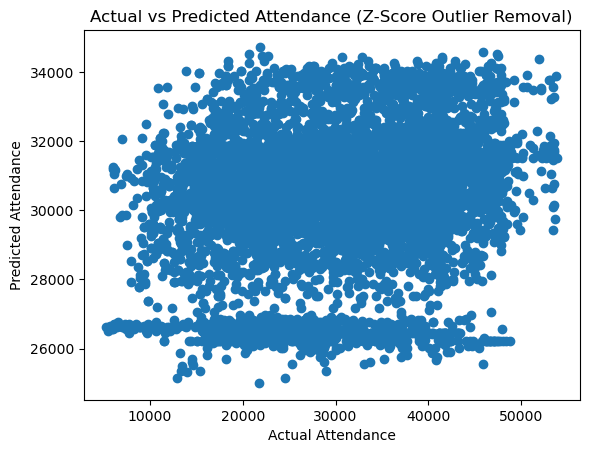

In [48]:
# aiming to improve the accuracy and efficiency again, I removed outliers and then evaluated the model performance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate IQR for Actual Attendance
Q1_actual = merged_df['attendance'].quantile(0.25)
Q3_actual = merged_df['attendance'].quantile(0.75)
IQR_actual = Q3_actual - Q1_actual

# Calculate IQR for Predicted Attendance
Q1_pred = merged_df['predicted_attendance'].quantile(0.25)
Q3_pred = merged_df['predicted_attendance'].quantile(0.75)
IQR_pred = Q3_pred - Q1_pred

# Stricter IQR Filtering (Using 1.0 * IQR Instead of 1.5)
lower_bound_actual = Q1_actual - 1.0 * IQR_actual
upper_bound_actual = Q3_actual + 1.0 * IQR_actual

lower_bound_pred = Q1_pred - 1.0 * IQR_pred
upper_bound_pred = Q3_pred + 1.0 * IQR_pred

filtered_df_iqr = merged_df[
    (merged_df['attendance'] >= lower_bound_actual) & (merged_df['attendance'] <= upper_bound_actual) &
    (merged_df['predicted_attendance'] >= lower_bound_pred) & (merged_df['predicted_attendance'] <= upper_bound_pred)
]

# Z-Score Filtering (Remove Values with Z-score > 2.5)
z_scores = np.abs(stats.zscore(merged_df[['attendance', 'predicted_attendance']]))
filtered_df_z = merged_df[(z_scores < 2.5).all(axis=1)]

# Choose the dataset with the lowest MAE
def evaluate_model(df, method_name):
    actual_attendance_cleaned = df['attendance']
    predicted_attendance_cleaned = df['predicted_attendance']

    mae_cleaned = mean_absolute_error(actual_attendance_cleaned, predicted_attendance_cleaned)
    r2_cleaned = r2_score(actual_attendance_cleaned, predicted_attendance_cleaned)

    print(f'{method_name} - Dataset Size: {len(df)}')
    print(f'{method_name} - MAE: {mae_cleaned}')
    print(f'{method_name} - R-squared: {r2_cleaned}')
    print('-' * 40)
    
    return df, mae_cleaned, r2_cleaned

df_iqr, mae_iqr, r2_iqr = evaluate_model(filtered_df_iqr, "Stricter IQR")
df_z, mae_z, r2_z = evaluate_model(filtered_df_z, "Z-Score")

# Choose the best dataset (whichever has the lowest MAE)
if mae_iqr < mae_z:
    best_df = df_iqr
    best_method = "Stricter IQR"
else:
    best_df = df_z
    best_method = "Z-Score"

print(f"Best Method: {best_method}")

# Replot scatter plot after removing outliers
plt.scatter(best_df['attendance'], best_df['predicted_attendance'])
plt.xlabel('Actual Attendance')
plt.ylabel('Predicted Attendance')
plt.title(f'Actual vs Predicted Attendance ({best_method} Outlier Removal)')
plt.show()


In [47]:
#adding in more columns

merged_df['day_of_week'] = pd.to_datetime(merged_df['date']).dt.dayofweek
merged_df['month'] = pd.to_datetime(merged_df['date']).dt.month
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
merged_df['start_hour'] = pd.to_datetime(merged_df['start_time']).dt.hour
merged_df['is_night_game'] = (merged_df['start_hour'] >= 18).astype(int)
merged_df['home_win_pct'] = merged_df.groupby('Team')['home_final_score'].transform(lambda x: x.expanding().mean())
merged_df['away_win_pct'] = merged_df.groupby('away_team')['away_final_score'].transform(lambda x: x.expanding().mean())


In [51]:
# Define the columns I want to keep
columns_to_keep = [
    'attendance',  # Target variable
    'home_final_score', 'away_final_score',  # Game performance
    'Team', 'away_team',  # Team names 
    'weather_encoded', 'temperature_numeric', 'wind_numeric',  # Weather impact
    'delay',  # Delays might affect attendance
    'Average Ticket Price',  # Key economic factor
    'day_of_week', 'month', 'is_weekend',  # Time-based features
    'is_night_game',  # Night vs. day game
    'home_win_pct', 'away_win_pct'  # Team performance metrics
]

# Drop all other columns
merged_df = merged_df[columns_to_keep]


In [60]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
le = LabelEncoder()
# Use .loc to modify the specific columns in the DataFrame
merged_df.loc[:, 'Team'] = le.fit_transform(merged_df['Team'])
merged_df.loc[:, 'away_team'] = le.fit_transform(merged_df['away_team'])

# Scale numeric features
from sklearn.preprocessing import StandardScaler
# Define columns to scale
columns_to_scale = ['temperature_numeric', 'wind_numeric', 'delay', 'Average Ticket Price', 'home_win_pct', 'away_win_pct']
# Apply standard scaling
scaler = StandardScaler()
merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])

# Handle missing values more safely
# First, check if 'weather_encoded' exists and has missing values
if 'weather_encoded' in merged_df.columns:
    # Fill missing values with 0 or another appropriate value
    merged_df['weather_encoded'] = merged_df['weather_encoded'].fillna(0)

# Fill any remaining missing values in the dataset
merged_df = merged_df.fillna(merged_df.mean())

# Split data into features (X) and target (y)
X = merged_df[['attendance', 'temperature_numeric', 'wind_numeric', 'delay', 'Average Ticket Price', 
               'day_of_week', 'month', 'is_weekend', 'is_night_game', 'home_win_pct', 'away_win_pct', 
               'weather_encoded']]
y = merged_df['home_final_score']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 9.660106770163337
R^2: 0.055389655216845246


In [61]:
from sklearn.model_selection import train_test_split

# Define the target variable (e.g., 'attendance') and features (the rest)
X = merged_df[['temperature_numeric', 'wind_numeric', 'delay', 'Average Ticket Price', 
               'home_win_pct', 'away_win_pct', 'weather_encoded', 'day_of_week', 'month', 'is_weekend', 'is_night_game']]
y = merged_df['attendance']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 81713254.3239507
R-squared (R2): 0.21153394015853766


In [62]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'R-squared (R2): {r2_rf}')


Mean Squared Error (MSE): 26259692.462948166
R-squared (R2): 0.7466154491066384


Good Accuracy: The model explains about 75% of the variation in attendance, which is a solid result in most cases.
MSE indicates room for improvement however: Although the MSE is relatively small, there’s still room to refine the model. I could try different model algorithms, tune hyperparameters, or add more relevant features to improve performance.
Further analysis: To evaluate how well the model is performing, I could also look at the residuals (the differences between predicted and actual values). This can help identify areas where the model is underperforming.

In [63]:
# Now i am trying to make the model even more accurate
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Features
X = merged_df[['temperature_numeric', 'wind_numeric', 'delay', 'Average Ticket Price', 
               'home_win_pct', 'away_win_pct', 'weather_encoded', 'day_of_week', 
               'month', 'is_weekend', 'is_night_game']]

# Target
y = merged_df['attendance']  # Assuming 'attendance' is the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation results
print(f"Cross-validated MSE: {-cv_scores.mean()}")

#hyperparamic tuning
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid, cv=3, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_


Mean Squared Error: 24240747.432252597
R-squared: 0.76609661708311
Cross-validated MSE: 46880412.457741514
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [64]:
#re evalute model
# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Calculate metrics for the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Squared Error: {mse_best}")
print(f"Optimized R-squared: {r2_best}")


Optimized Mean Squared Error: 23025459.921083294
Optimized R-squared: 0.7778231474169452


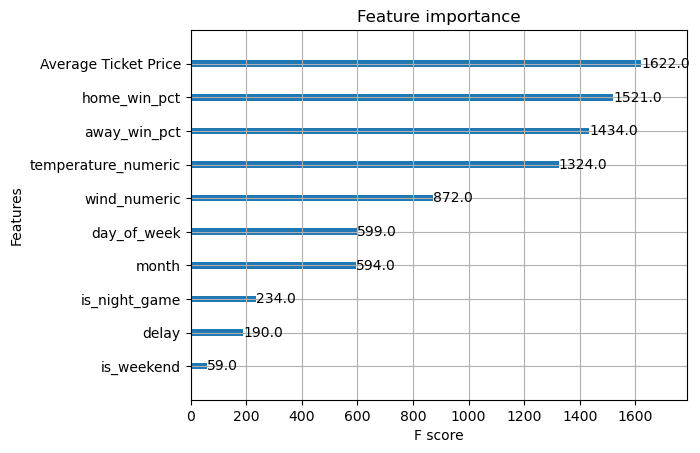

In [65]:
# Plot feature importance
xgb.plot_importance(best_model)
plt.show()


Results Interpretation:
Optimized Mean Squared Error (MSE):

MSE: 23,025,459.92
The Mean Squared Error is a measure of how far off the predictions are from the actual values. A lower MSE indicates better model performance. My MSE is lower than before, which indicates that the optimization process has improved the model, but the model still has some prediction error. Ideally, the MSE should be as low as possible.
Optimized R-squared (R2):

R-squared: 0.778
This value tells us how well the model explains the variability in the target variable (attendance). A value of 0.778 means that around 77.8% of the variation in attendance is explained by the model. This is a good result for a regression model and indicates that the model is capturing most of the relationships in the data.

Model Type:
Gradient Boosting Model (XGBoost):
The model I built is XGBoost, which is an ensemble learning technique based on gradient boosting. Gradient boosting builds strong predictive models by combining multiple weak learners (typically decision trees). It does this sequentially, where each subsequent tree tries to correct the errors of the previous ones.

Key Features of XGBoost:
It can handle non-linear relationships in data well.
It is resistant to overfitting (especially with hyperparameter tuning).
It generally performs better than simple linear models when there are complex interactions between features.
Feature Importance (Graph):
The values from the graph indicate the relative importance of each feature in predicting the target variable (attendance). 

Average Ticket Price (1622):
This is the most important feature in the model. It suggests that ticket prices have a strong influence on game attendance. This makes sense because ticket prices can directly affect demand.

Home Win Percentage (1521):
This feature also plays a crucial role, meaning that the performance of the home team significantly impacts attendance. Higher home win percentages likely lead to higher attendance, as winning teams tend to attract more fans.

Away Win Percentage (1434):
This shows that the win percentage of the away team also influences attendance. Games with stronger away teams (especially those with higher win percentages) may attract more fans, particularly if the game is perceived as a competitive match.

Temperature (1324):
Weather conditions like temperature can impact attendance, especially if games are held outdoors. Extreme temperatures (too hot or too cold) may discourage fans from attending.

Wind (872):
Wind conditions could also affect the comfort of watching a game, especially for outdoor sports like baseball, but its influence is smaller than that of temperature.

Day of Week (599):
This indicates that games played on certain days (e.g., weekends) might see higher attendance than others. People are more likely to attend games on days when they are off work (like Saturday and Sunday).

Month (594):
Seasonality can affect attendance. For example, games at the start of the season or during key holidays may see higher attendance.

Is Night Game (234):
Night games tend to be more attractive to fans who can't make it to daytime games due to work or school commitments. This feature has a moderate impact on attendance.

Delay (190):
Game delays generally reduce attendance, as fans might leave or choose not to attend if there are known delays.

Is Weekend (59):
Games held on weekends tend to attract more fans, as people are generally more available to attend during their days off. However, this feature has the smallest impact on the model relative to others.

What This Means for Your Model:
Your model is able to explain about 77.8% of the variation in the attendance based on features like ticket price, win percentages, weather conditions, and game day characteristics.
The model is built to predict attendance based on the inputs you’ve provided. This is useful for planning, such as optimizing ticket prices or marketing strategies, or for better understanding what influences fan behavior.
The feature importance graph tells you which variables have the most predictive power. For instance, ticket price, win percentages, and temperature are the key drivers of attendance, while whether the game is on the weekend has less influence.
Possible Next Steps:
Model Refinement:
You could experiment with other models like Random Forests or LightGBM to see if they give better results than XGBoost.

Hyperparameter Tuning:
Further fine-tune your model's hyperparameters to improve accuracy. You could try a larger search space or use RandomizedSearchCV for more efficient tuning.

Feature Engineering:
Consider adding interaction features, such as combining home_win_pct and away_win_pct to create a "win_margin" feature, or look at historical attendance data to predict current attendance based on trends.

Time Series:
If your data includes dates over multiple seasons, you might want to explore time-series models to capture seasonality effects better.